layer_Origin_output (None, 28, 28, 1) layer_0_output (None, 28, 28, 32) layer_1_output (None, 14, 14, 32) layer_2_output (None, 7, 7, 64) layer_add_output (None, 7, 7, 64) layer_3_output (None, 4, 4, 32) layer_4_output (None, 4, 4, 128)
1/1 [==============================] - 0s 54ms/step


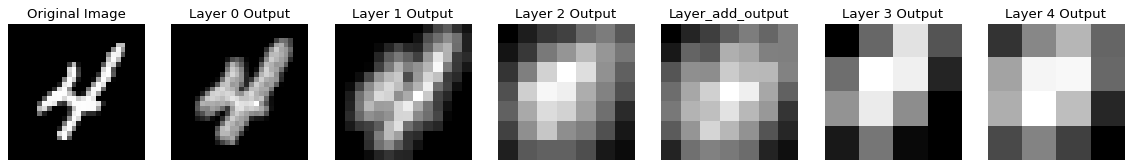

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, Input, MaxPooling2D
from tensorflow.keras.models import Model

# Load and preprocess the data
(train_images, _), (_, _) = mnist.load_data()
train_images = np.expand_dims(train_images, -1).astype('float32') / 255

# Define the input shape
input_img = Input(shape=(28, 28, 1))

# Create a model with multiple convolutional layers
layer_0_output = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(layer_0_output)
layer_1_output = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(layer_1_output)
layer_2_output = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
layer_add_output = Conv2D(64, (3, 3), activation='relu', padding='same')(x)  # Additional convolutional layer
layer_3_output = MaxPooling2D((2, 2), padding='same')(x)  # Output of the third layer
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)  # Additional convolutional layer
layer_4_output = MaxPooling2D((2, 2), padding='same')(x)  # Output of the fourth layer
print("layer_Origin_output",input_img.shape,
      "layer_0_output",layer_0_output.shape,
      "layer_1_output",layer_1_output.shape,
      "layer_2_output",layer_2_output.shape,
      "layer_add_output",layer_add_output.shape,
      "layer_3_output",layer_3_output.shape,
      "layer_4_output",layer_4_output.shape)

# Final model
model = Model(inputs=input_img, outputs=[layer_0_output, layer_1_output, layer_2_output,layer_add_output, layer_3_output, layer_4_output])

# Select one sample image
sample_image = train_images[9:10]  # Select the 10th image for demonstration

# Get the output of each layer
layer_outputs = model.predict(sample_image)

# Function to plot the original image and the output of convolutional layers
def plot_image_and_layer_outputs(original_image, layer_outputs, layer_names):
    plt.figure(figsize=(18, 8))

    # Plot the original image
    plt.subplot(1, len(layer_outputs) + 1, 1)
    plt.imshow(original_image.squeeze(), cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Plot the output of each convolutional layer
    for i, (layer_output, layer_name) in enumerate(zip(layer_outputs, layer_names), start=2):
        # Taking the mean over the channels of the feature map to visualize it as a 2D image
        feature_map = np.mean(layer_output[0], axis=-1)
        plt.subplot(1, len(layer_outputs) + 1, i)
        plt.imshow(feature_map, cmap='gray')
        plt.title(layer_name)
        plt.axis('off')

    plt.show()

plot_image_and_layer_outputs(sample_image, layer_outputs, ['Layer 0 Output','Layer 1 Output', 'Layer 2 Output','Layer_add_output', 'Layer 3 Output', 'Layer 4 Output'])


In [ ]:
model.save("savedmodel.keras")